In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import cross_val_score as CSV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection  import cross_val_score as CVS


## Reading Train and Test Data

In [4]:
train_data = pd.read_csv("/content/Train.csv")
test_data = pd.read_csv("/content/Test.csv")

In [5]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Dimensions of train and test data

In [7]:
print("Training Set (rows,columns) are: {}".format(train_data.shape))
print("Testing Set (rows,columns) are: {}".format(test_data.shape))

Training Set (rows,columns) are: (8523, 12)
Testing Set (rows,columns) are: (5681, 11)


## info of test and train data

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## Null Values in test and train data

In [12]:
print("train data:\n")
train_data.isnull().sum().sort_values(ascending=False)

train data:



Outlet_Size                  2410
Item_Weight                  1463
Item_Outlet_Sales               0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

In [13]:
print("Test Data:\n")
test_data.isnull().sum().sort_values(ascending=False)

Test Data:



Outlet_Size                  1606
Item_Weight                   976
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

In [14]:
print("Percentage of missing values in train data\n")
train_data.isnull().sum()/train_data.shape[0]*100

Percentage of missing values in train data



Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [15]:
print("Percentage of missing values in test data\n")
test_data.isnull().sum()/test_data.shape[0]*100

Percentage of missing values in test data



Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [16]:
print("Outlet Size:\n\n",train_data["Outlet_Size"].value_counts())

Outlet Size:

 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [17]:
print("Item_weigh:\n\n",train_data["Item_Weight"].value_counts())

Item_weigh:

 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64


## Imputing Missing Values

In [18]:
train_data['Outlet_Size'].mode()   #outlet_size is categorical in nature

0    Medium
dtype: object

In [19]:
train_data['Item_Weight'].mean()

12.857645184136183

In [20]:
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].dropna().mode().values[0])

In [21]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)

In [22]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
test_data['Outlet_Size'].mode()   #outlet_size is categorical in nature

0    Medium
dtype: object

In [24]:
test_data['Item_Weight'].mean()

12.695633368756374

In [25]:
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].dropna().mode().values[0])

In [26]:
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace=True)

In [27]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## finding Categorical and Numerical Features in Train and Test Data

In [28]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtype!="O"]
numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [29]:
numerical_features_test = [feature for feature in test_data.columns if test_data[feature].dtype!="O"]
numerical_features_test

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [30]:
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtype=='O']
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [31]:
categorical_features_test = [feature for feature in test_data.columns if test_data[feature].dtype=='O']
categorical_features_test

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

## Distribution of Numerical data

In [32]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


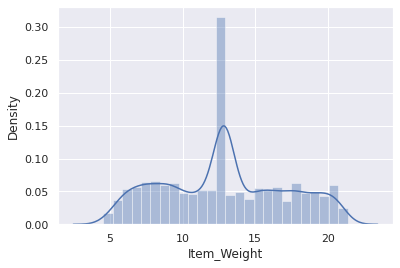

In [33]:
sns.distplot(train_data['Item_Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


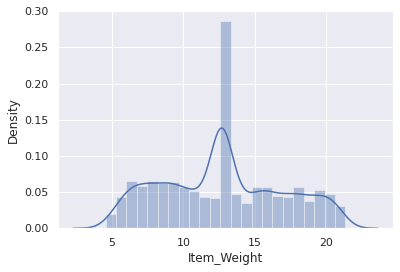

In [34]:
sns.distplot(test_data['Item_Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


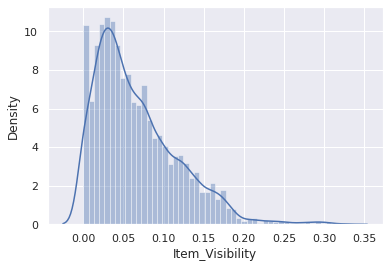

In [35]:
sns.distplot(train_data['Item_Visibility'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


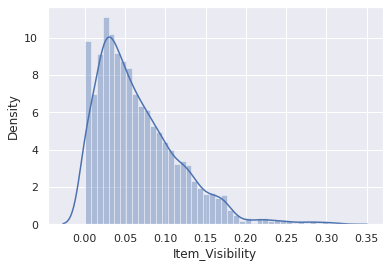

In [36]:
sns.distplot(test_data['Item_Visibility'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


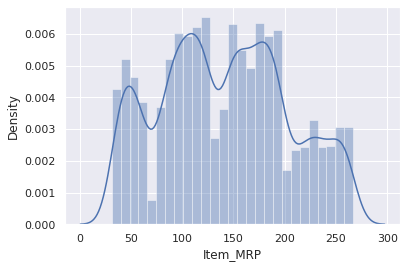

In [37]:
sns.distplot(train_data["Item_MRP"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


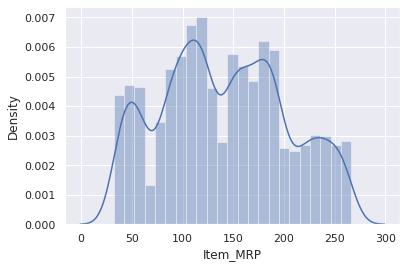

In [38]:
sns.distplot(test_data["Item_MRP"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


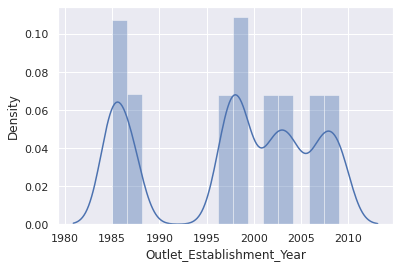

In [39]:
sns.distplot(train_data["Outlet_Establishment_Year"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


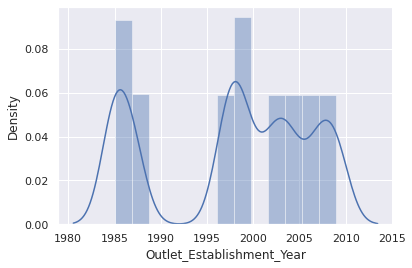

In [40]:
sns.distplot(test_data["Outlet_Establishment_Year"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


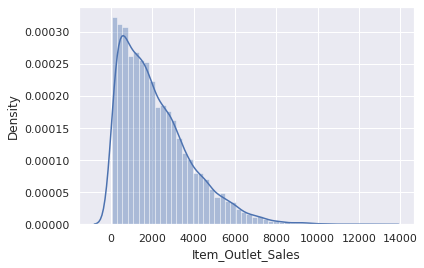

In [41]:
sns.distplot(train_data['Item_Outlet_Sales'])

## Cardinality of Categorical_Data

In [42]:
for feature in categorical_features:
  print("Categories in {} feature are:{}".format(feature,train_data[feature].unique()))
  print("No of Categories in {} feature are:{}".format(feature,len(train_data[feature].unique())))


print("\n\n\n\n\n")
for feature in categorical_features_test:
  print("Categories in {} feature are:{}".format(feature,test_data[feature].unique()))
  print("No of Categories in {} feature are:{}".format(feature,len(test_data[feature].unique())))


  


Categories in Item_Identifier feature are:['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
No of Categories in Item_Identifier feature are:1559
Categories in Item_Fat_Content feature are:['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
No of Categories in Item_Fat_Content feature are:5
Categories in Item_Type feature are:['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
No of Categories in Item_Type feature are:16
Categories in Outlet_Identifier feature are:['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
No of Categories in Outlet_Identifier feature are:10
Categories in Outlet_Size feature are:['Medium' 'High' 'Small']
No of Categories in Outlet_Size feature are:3
Categories in Outlet_Location_Type feature are:['Tier 1' 'Tier 3' 'Tier 2']
No of Categories in Outlet_Location_Type fe

Feature Item_Fat_Content has similar wordings like Low Fat, low fat, LF and Regular,reg

lets Change those into single notation

In [43]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'Low Fat': 'Low Fat','low fat':'Low Fat','LF':'Low Fat'})

In [44]:
train_data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'reg'], dtype=object)

In [45]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({'Low Fat': 'Low Fat','low fat':'Low Fat','LF':'Low Fat'})

In [46]:
test_data["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular'], dtype=object)

In [47]:
train_data["Outlet_age"] = train_data["Outlet_Establishment_Year"].apply(lambda year:2021-year)

In [48]:
test_data["Outlet_age"] = test_data["Outlet_Establishment_Year"].apply(lambda year:2021-year)

In [49]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


In [50]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,22
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,14
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,23
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,14
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,36


Features like Item_weight , Item_Invisibility, Item_MRP, Item_outlet_sales are not normally distributed


Converting those to Normal Distributions.


Before that lets Visualisize the Categorical data:

## Data Visuilazation for Categorical Data

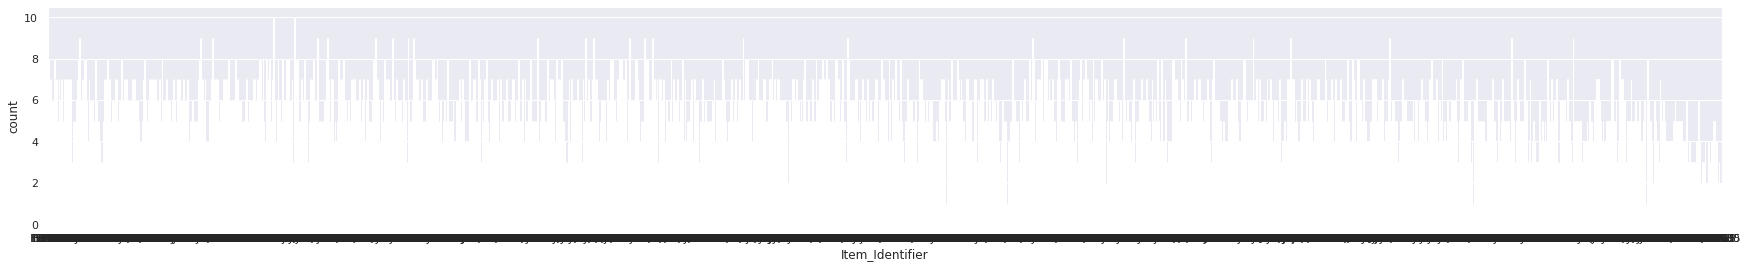

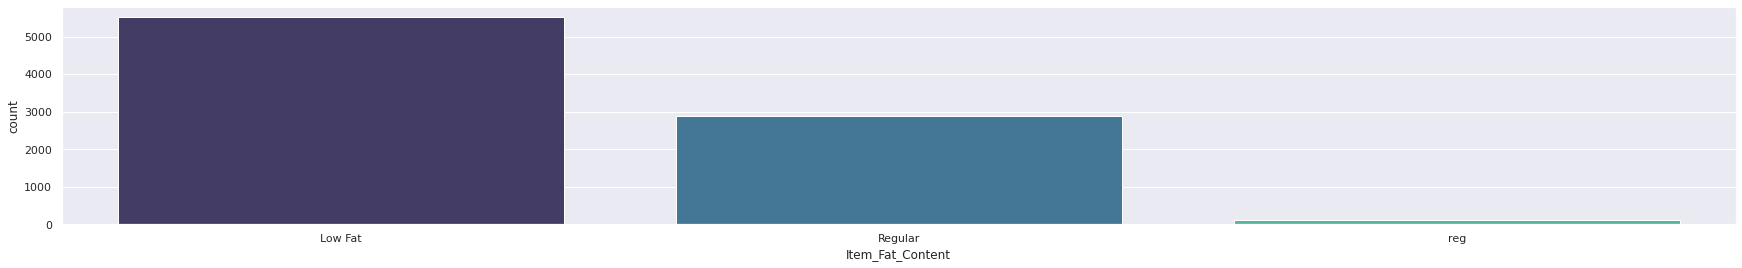

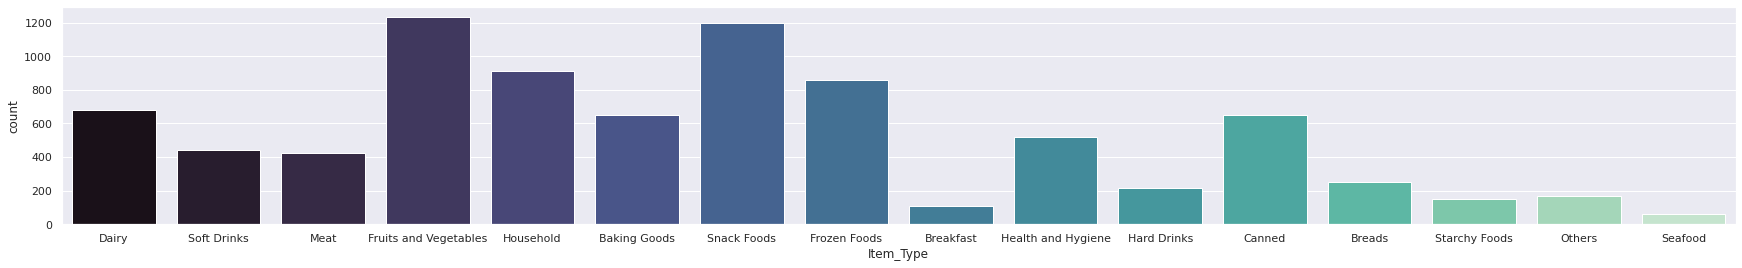

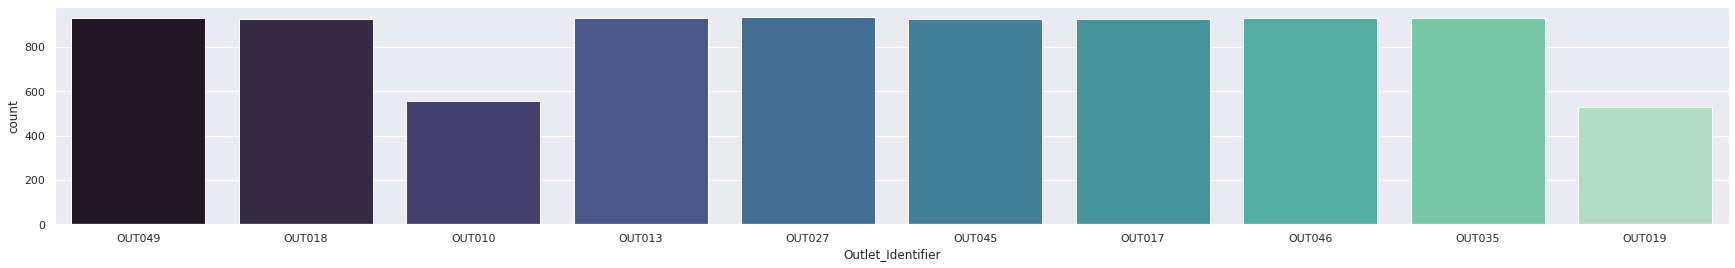

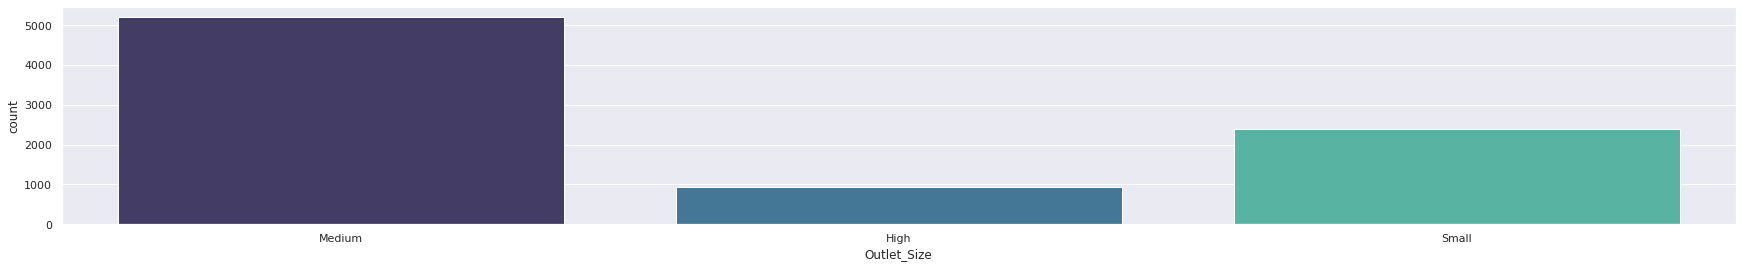

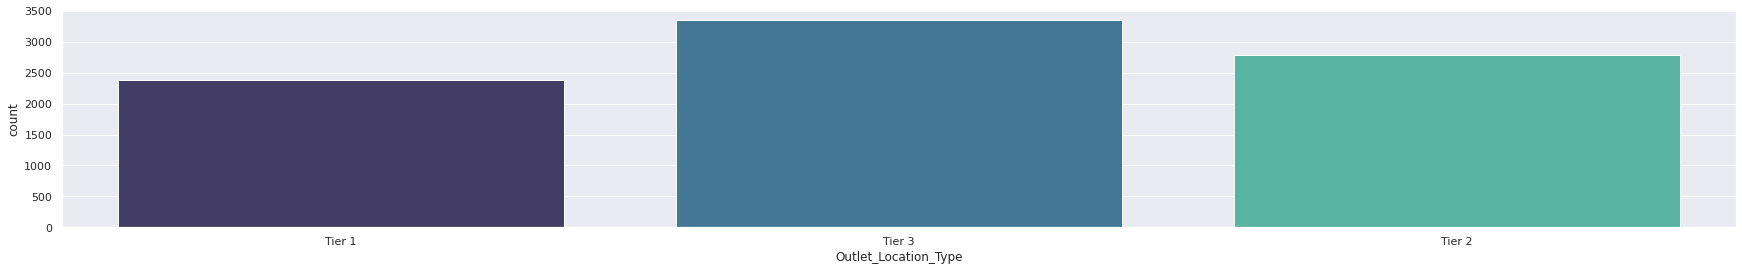

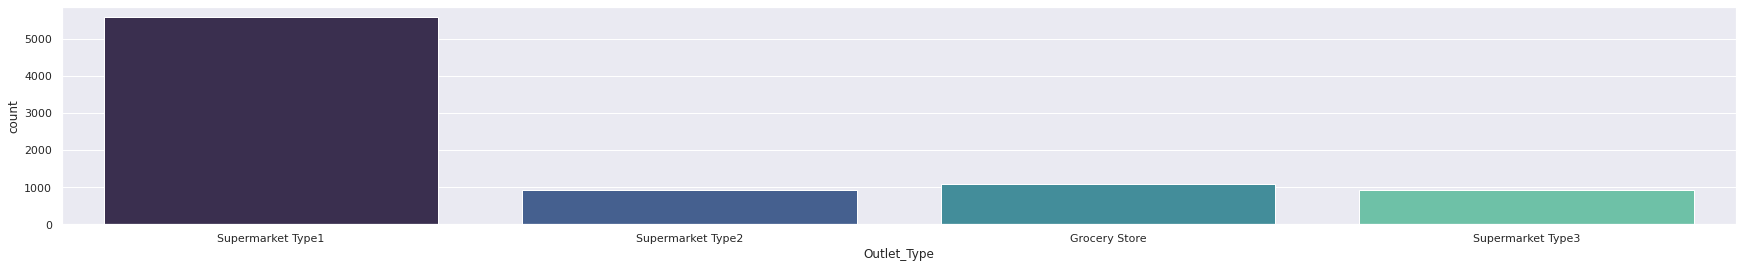

In [51]:
for feature in categorical_features:
  plt.figure(figsize=(30,4))
  sns.countplot(x=train_data[feature],data=train_data,palette='mako')
  plt.xlabel(feature)
  plt.show()

## Observations:

*    Item_fat_Content : Most items sold are "LOW FAT"

*    Item_type : Item Type that are more popular were "Fruits and Vegetables","Snack Food","Household","Frozen foods"

*   Outlet_Identifier : Sold items are Eventually distibuted among all the outlets except "OUTO10" and "OUTO19".

*    Outlet_size :  most of the outlet sizes for bigmart are "Medium" in the given data.

*   Outlet_Location_type : most of the Outlet Locations are "Tier-3" Category.

*   Outlet_type : most of Outlet types are "Supermarket Type-1".


## Data Visualization for Numerical Data

In [52]:
numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [53]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_age'],
      dtype='object')

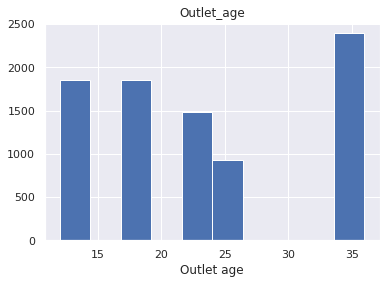

In [54]:
plt.hist(train_data['Outlet_age'])
plt.xlabel("Outlet age")
plt.title("Outlet_age")
plt.show()

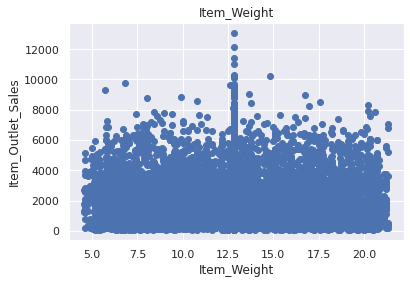

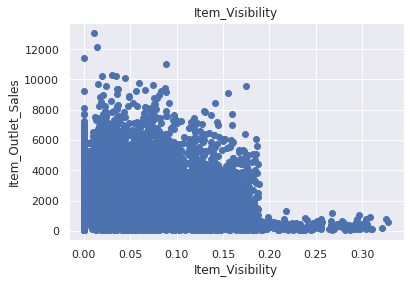

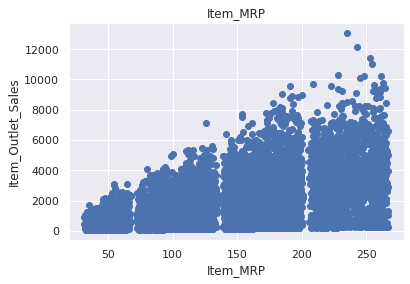

In [55]:
Num_features = ['Item_Weight','Item_Visibility','Item_MRP']
for feature in Num_features:
  plt.scatter(x=train_data[feature],y=train_data['Item_Outlet_Sales'])
  plt.xlabel(feature)
  plt.ylabel("Item_Outlet_Sales")
  plt.title(feature)
  plt.show()

## Observations

*   Outlet_age : most of outlets are around the age of 35 years till date

*   Item_Weight : No Specific Pattern

*   Item_Visibility : items with 0.00 to 0.20 nearly are more sold.

*   Item_MRP : Items with higher MRP tend to sell better in most of the cases.

In [56]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

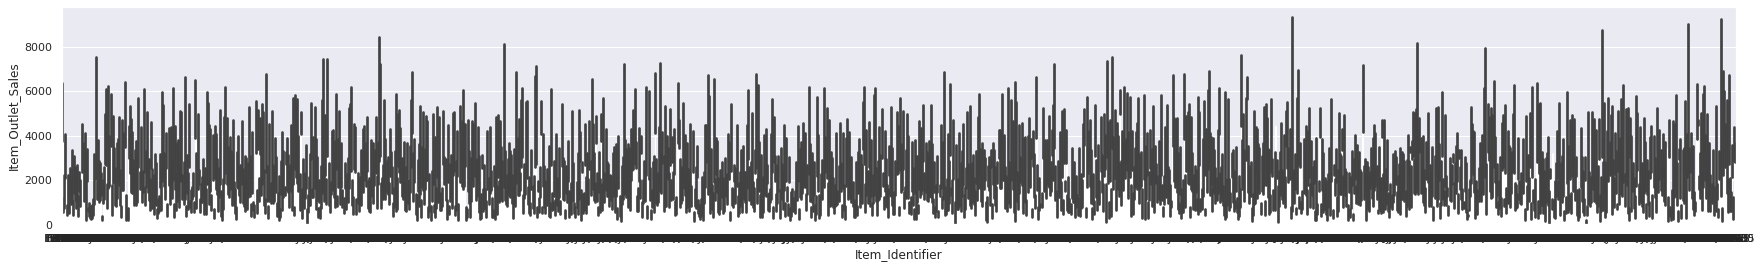

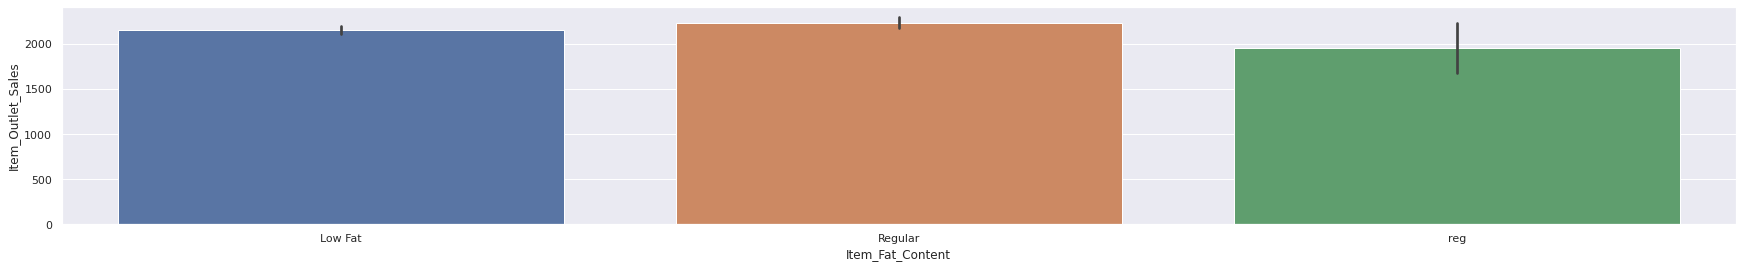

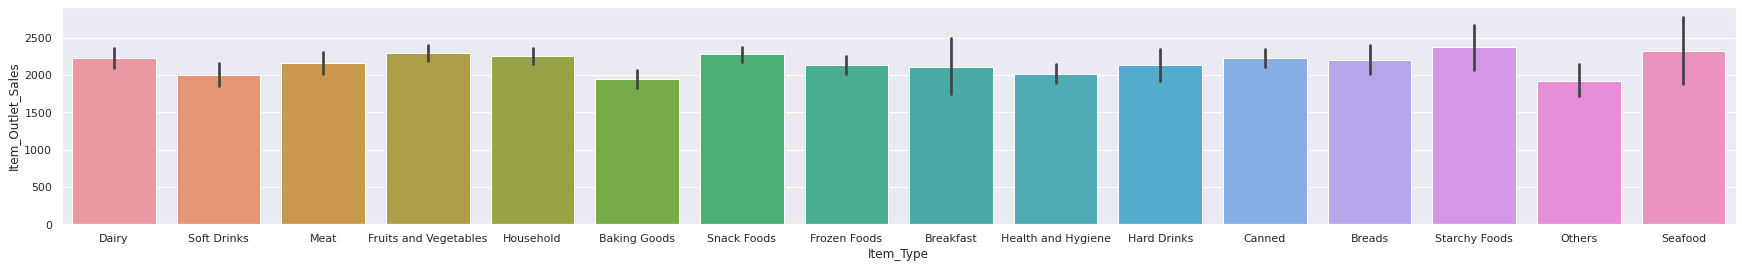

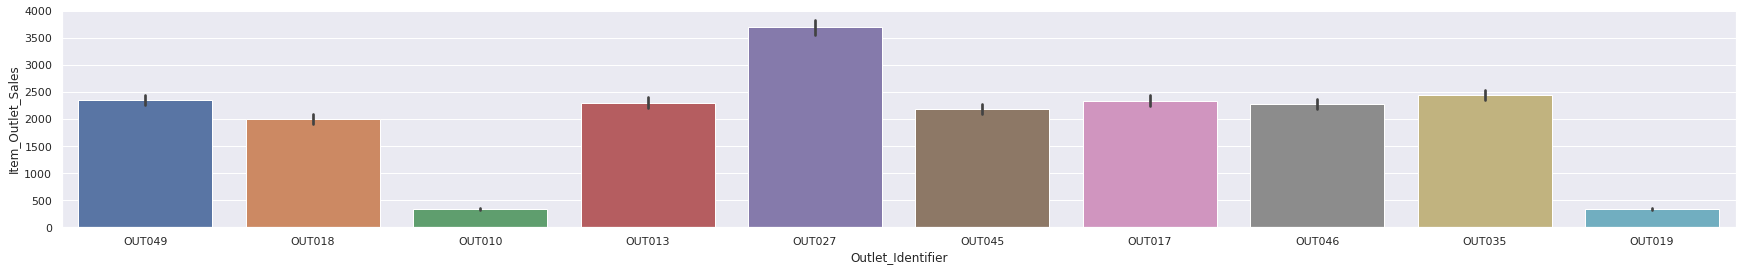

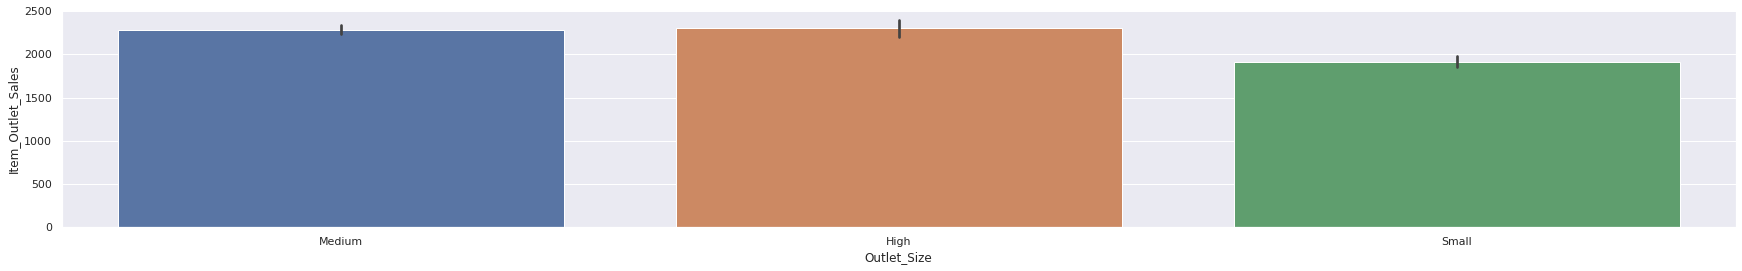

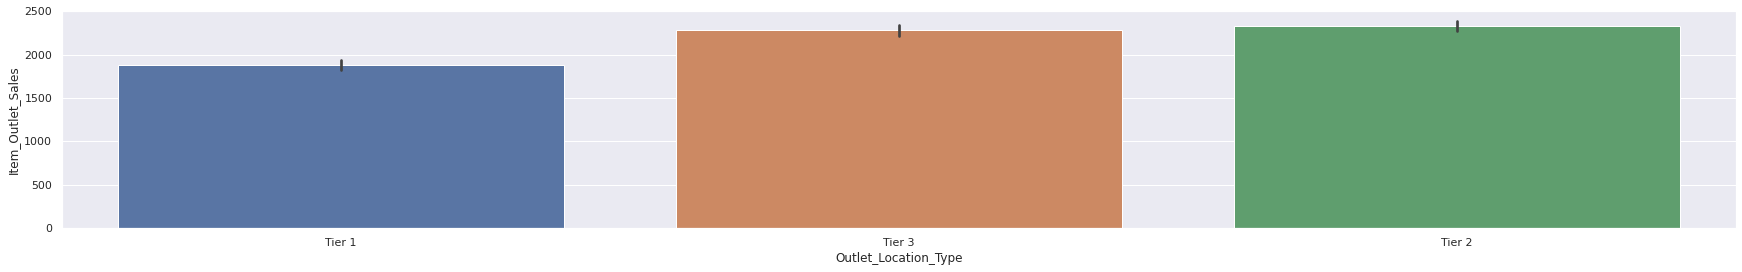

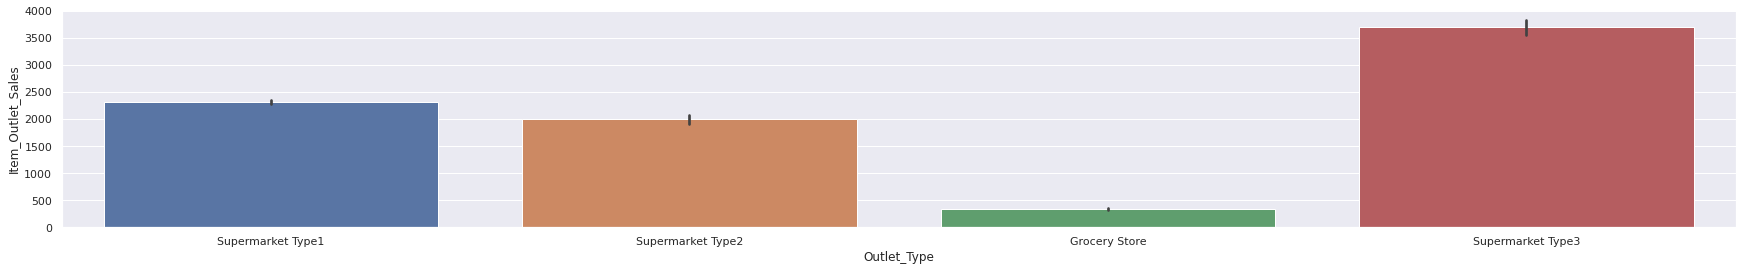

In [57]:
for feature in categorical_features:
  plt.figure(figsize=(30,4))
  sns.barplot(x=train_data[feature],y=train_data['Item_Outlet_Sales'],data=train_data)
  plt.xlabel(feature)
  plt.ylabel("Item_Outlet_Sales")
  plt.show()

## Observations:


*    Item_Fat_Content , Item_Type , Outlet_size, Outlet_Location_type are more or less Contributing the same for Sales

*   Among Outlet_Identifier OUTO27 is the most profitable store and there is a big Difference between each specific Outlet.

*   Suprisingly Supermarket_Type3 is contributing more to Sales than Supermarket_type1

In [58]:
train_data['Outlet_Establishment_Year'] = train_data['Outlet_age']

In [59]:
test_data['Outlet_Establishment_Year'] = test_data['Outlet_age']

In [60]:
train_data.drop(['Outlet_age'],axis=1,inplace=True)

In [61]:
test_data.drop(['Outlet_age'],axis=1,inplace=True)

In [62]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,22,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,12,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,22,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,23,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,34,High,Tier 3,Supermarket Type1,994.7052


In [63]:
numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [64]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,-0.005020,0.567574
Outlet_Establishment_Year,0.008301,0.074834,-0.005020,1.000000,0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,0.049135,1.000000


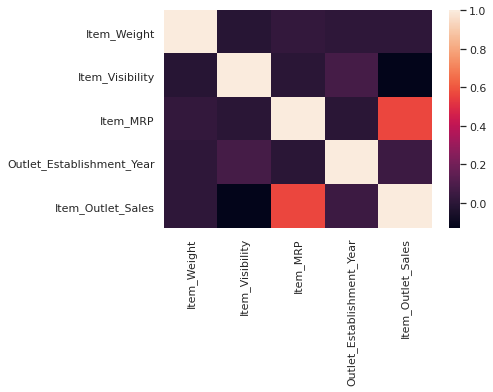

In [65]:
sns.heatmap(train_data.corr(),cmap="rocket")

Item_Outlet_Sales and Item_MRP are highly correlated with each other

## Encoding some of the features

In [66]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Here the ordinal features are: which depends upon the order.

1.   Item_Fat_Content
2.   Outlet_Size
3.   Outlet_Location_type


Nominal Features are : order of the types doesn't Matter



1.   Item_Identifier
2.   Item_type
3.   Outlet_Indentifier
4.   Outlet_Type


In [67]:
train_data[categorical_features].apply(lambda x:x.nunique())

Item_Identifier         1559
Item_Fat_Content           3
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [68]:
train_data[numerical_features].apply(lambda x:x.nunique())

Item_Weight                   416
Item_Visibility              7880
Item_MRP                     5938
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
dtype: int64

Outlet_Identifier, Item_Identifier, Outlet_Establishment_year are droped.

The features Outlet_type , Item_type are encoded

In [69]:
le =  LabelEncoder()
Labels = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']
for label in Labels:
  train_data[label] = le.fit_transform(train_data[label])
  test_data[label] = le.fit_transform(test_data[label])


In [70]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,22,1,0,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,12,1,2,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,22,1,0,Supermarket Type1,2097.2700
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,23,1,2,Grocery Store,732.3800
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,34,0,2,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,34,0,2,Supermarket Type1,2778.3834
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,19,1,1,Supermarket Type1,549.2850
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,17,2,1,Supermarket Type1,1193.1136
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,12,1,2,Supermarket Type2,1845.5976


In [71]:
cols = ['Item_Type','Outlet_Type']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(train_data[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(test_data[cols])).astype('int64')

In [72]:
tr_oh.columns = OH_encoder.get_feature_names(cols)
te_oh.columns = OH_encoder.get_feature_names(cols)

In [73]:
tr_oh.index = train_data.index
te_oh.index = test_data.index

In [74]:
tr_fe = pd.concat([train_data, tr_oh], axis=1)
te_fe = pd.concat([test_data, te_oh], axis=1)

In [75]:
tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Type','Outlet_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Type','Outlet_Type'],axis=1)

In [76]:
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [77]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [78]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [79]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

In [80]:
print('Mean Absolute Error = {}'.format(LR_MAE))
print("Mean Square Error = {}".format(LR_MSE))
print("R^2 Error is {}".format(LR_R_2))
print("Cross Validation Score is {}".format(LR_CS))
cross_val(LR,LinearRegression(),X,y,5)

Mean Absolute Error = 837.99
Mean Square Error = 1287986.61
R^2 Error is 0.5585
Cross Validation Score is 0.5577
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) score: 0.5582


In [81]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")

In [82]:
LA = Lasso(alpha=0.05)
LA.fit(X_train,y_train)
y_predict = LA.predict(X_test)
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

In [83]:
print('Mean Absolute Error = {}'.format(LR_MAE))
print("Mean Square Error = {}".format(LR_MSE))
print("R^2 Error is {}".format(LR_R_2))
print("Cross Validation Score is {}".format(LR_CS))
cross_val(LR,LinearRegression(),X,y,5)

Mean Absolute Error = 837.99
Mean Square Error = 1287986.61
R^2 Error is 0.5585
Cross Validation Score is 0.5577
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) score: 0.5582


In [84]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv("Lasso Regressor.csv")  

In [85]:
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)

RFR.fit(X_train, y_train)

y_predict = RFR.predict(X_test)


RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 1032.24

 Mean Squared Error: 1971177.35

 R^2 Score: 0.3244

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=4, oob_score=False,
                      random_state=101, verbose=0, warm_start=False) Scores:
0.56
0.52
0.52
0.55
0.56
Average RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_est

In [86]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")

In [87]:
MAE= [LR_MAE,RFR_MAE,LS_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
2,Lasso Regressor,837.89,1285804.00,0.5593,0.5577
0,Linear Regression,837.99,1287986.61,0.5585,0.5577
1,Random Forest Regressor,1032.24,1971177.35,0.3244,0.5918


In [95]:
from sklearn.model_selection import GridSearchCV
lr = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr,parameters, cv=None)
grid.fit(X_train, y_train)
grid.predict(X_test)


array([2624., 2528., 2160., ..., 1728., 1392.,  656.])

In [98]:
print( "r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
% np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.5478437095388756
Residual sum of squares: 1287986.61
